# IS 445 - Final Project Code

### Name: Garrett Moon

Skip down towards the end of the notebook to see data visualization code, the first half of the ipynb is data cleaning needed for proper visualization.

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 2000)

In [288]:
app_data = pd.read_csv('googleplaystore.csv')
user_data = pd.read_csv('googleplaystore_user_reviews.csv')

In [289]:
from bokeh.io import show, output_notebook

In [290]:
output_notebook()

Loading BokehJS ...

In [291]:
user_data.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], dtype='object')

In [292]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], dtype='object')

In [293]:
app_data.dtypes.value_counts()

object     12
float64     1
dtype: int64

In [294]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Need to data clean in order to change some dtypes which will help with a clean visualization in the end.

# Rating column:

In [295]:
# app_data['Rating'].value_counts()

Expected range is 1 to 5...

In [296]:
print('rating column range is:', app_data['Rating'].min(), 'to',app_data['Rating'].max())

rating column range is: 1.0 to 19.0


In [297]:
# strange outlier, we will comment/drop this out later.
app_data[app_data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [298]:
app_data['Rating'].isna().sum(), len(app_data['Rating'])
# (nulls, non-nulls)

(1474, 10841)

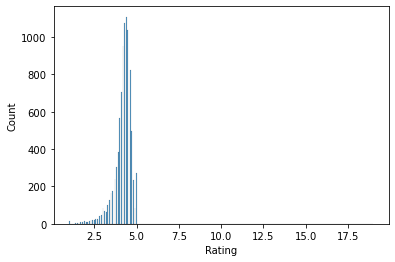

In [299]:
sns.histplot(data=app_data, x='Rating')

# Reviews column:

In [300]:
app_data.shape

(10841, 13)

In [301]:
app_data['Reviews'].dtype

dtype('O')

In [302]:
app_data['Reviews'].str.isnumeric().sum()

10840

In [303]:
app_data[~app_data['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Again, 1 row with a strange ratings column seems to be the only non-numeric str value.


Closer inspection reveals that several columns seem to be mis-entered in this row, 

specifically:
Genres, Installs, Type, Price, and Rating 

In [304]:
app_data.shape

(10841, 13)

In [305]:
# let's comment this row out so we can convert dtype and visualize this value later
app_data = app_data.drop(
            index=[10472],
            axis=0,
            )

In [306]:
app_data.shape

(10840, 13)

In [307]:
app_data.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [308]:
# check for any remaining nulls
app_data[~app_data['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [309]:
app_data['Reviews'].dtype

dtype('O')

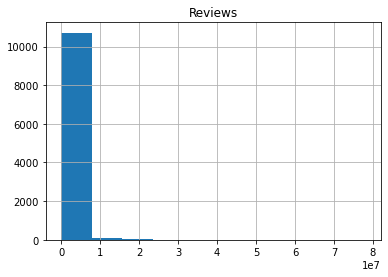

In [310]:
app_data['Reviews']=app_data['Reviews'].astype('float64')
# sns.histplot(data=app_data, x='Reviews')
app_data.hist(column = 'Reviews')
plt.xlabel='Reviews count'
plt.ylabel='Frequency'

# Size column:

In [311]:
# app_data['Size'].unique()

In [312]:
# app_data['Size'].unique()

app_data['Size']=app_data['Size'].str.replace('k','e+3')
app_data['Size']=app_data['Size'].str.replace('M','e+6')
app_data['Size'].head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [313]:
def can_convert(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
temp=app_data['Size'].apply(lambda size_num: can_convert(size_num))
temp

0         True
1         True
2         True
3         True
4         True
         ...  
10836     True
10837     True
10838     True
10839    False
10840     True
Name: Size, Length: 10840, dtype: bool

In [314]:
# find the value counts that are FALSE with [~temp] instead of [temp]
app_data['Size'][~temp].value_counts()

Varies with device    1695
Name: Size, dtype: int64

In [315]:
# fix in order to convert dtype to numeric

app_data['Size']=app_data['Size'].replace('Varies with device',np.nan)
app_data['Size']=app_data['Size'].replace('1,000+',1000)

In [316]:
# 'Varies with device' replaced with 1695 np.nan values
app_data['Size'].isna().sum()

1695

In [317]:
app_data['Size'] = app_data['Size'].astype('float64')

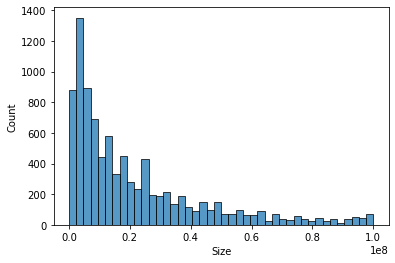

In [318]:
sns.histplot(data=app_data, x="Size")

# Installs column:

It is up for debate whether this column is better suited as strings or literal float values. Even though we could remove the `+`, the data is still sorted as categorical in a sense.

In [319]:
app_data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [320]:
# app_data['Installs'] = app_data['Installs'].str.replace(',','')
# app_data['Installs'] = app_data['Installs'].str.replace('+','')
# app_data['Installs'] = app_data['Installs'].replace('Free',np.nan)
# app_data['Installs'].value_counts()

In [321]:
# app_data['Installs'].str.isnumeric().sum()

In [322]:
# app_data['Installs'] = app_data['Installs'].astype('float64')

In [323]:
# app_data.hist(app_data['Installs'])
# plt.xlabel('No. of Installs')
# plt.ylabel('Frequency')

In [324]:
app_data['Installs'].dtype

dtype('O')

# Type

In [325]:
app_data['Type'].unique()
# app_data['Type'].value_counts

array(['Free', 'Paid', nan], dtype=object)

# Price

In [326]:
# app_data['Price'].value_counts()

In [327]:
app_data['Price']=app_data['Price'].apply(lambda price: price.strip('$'))

In [328]:
# app_data['Price'].unique()
app_data['Price'].dtype

dtype('O')

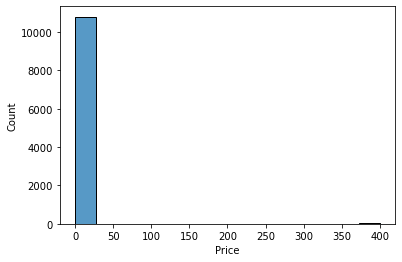

In [329]:
app_data['Price'] = pd.to_numeric(app_data['Price'])
sns.histplot(data=app_data, x='Price')

double check outliers... the expensive apps, do people pay for them?

In [330]:
temp2=app_data['Price'].apply(lambda price: True if price >= 100 else False)
# subset with the applied conditional in 'Price'
# show us the rows that meet the lambda condition...
app_data[temp2].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500000.0,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000.0,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800000.0,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700000.0,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600000.0,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000.0,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000.0,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000000.0,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965000.0,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


according to ratings, reviews and installs, people buy expensive googlestore playapps.

# Category column

In [331]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [332]:
app_data['Category'] = app_data['Category'].astype('category')

In [333]:
app_data['Category'].dtype

CategoricalDtype(categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'], ordered=False)

In [334]:
# app_data['Category'].value_counts().plot(kind='bar')
b = app_data.groupby(['Category'])['App'].count()
b = b.reset_index()
b.rename(columns = {'App': 'app_count'}, inplace = True)
b = b.sort_values('app_count', ascending = False)
b

,Category,app_count
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424
23,PERSONALIZATION,392
6,COMMUNICATION,387
28,SPORTS,384
18,LIFESTYLE,382


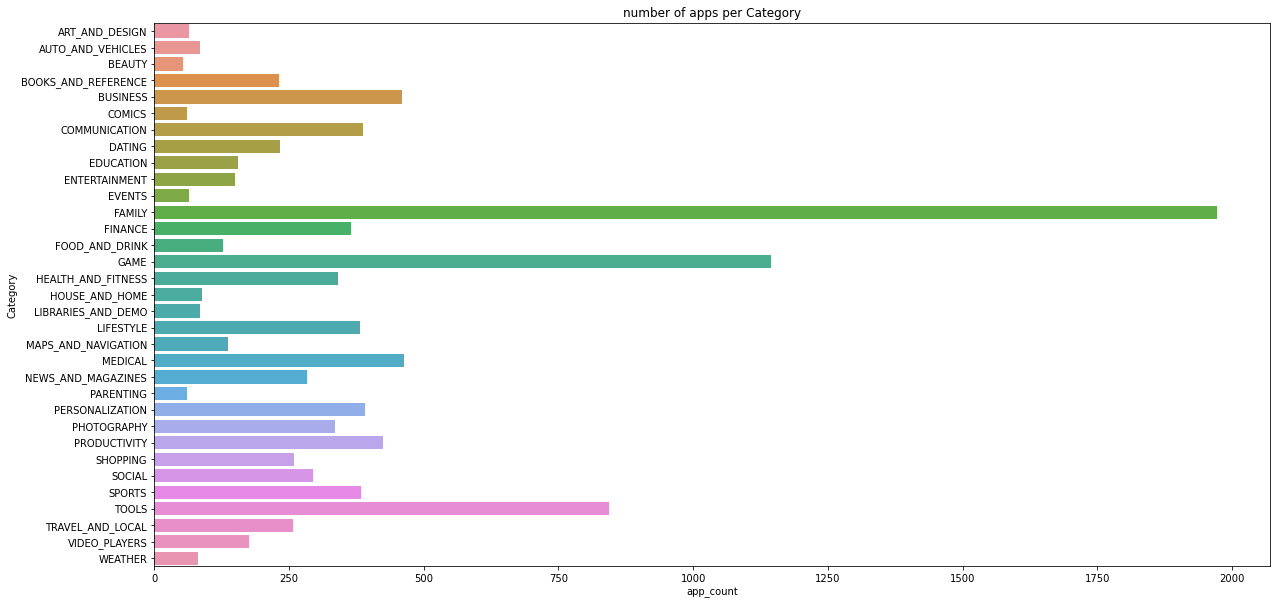

In [335]:
plt.figure(figsize = (20,10))
plt.title('number of apps per Category')
sns.barplot(y = 'Category', x = 'app_count', data = b)
plt.show()

# Content Rating column:

In [336]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

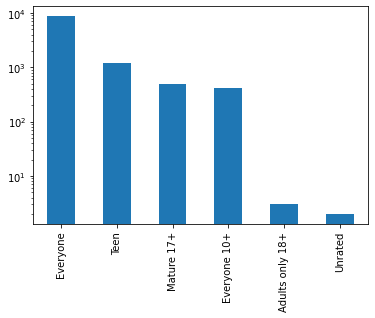

In [337]:
app_data['Content Rating'].value_counts().plot(kind='bar')
plt.yscale('log')

# Genres

In [338]:
app_data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

It seems there are main genres and then sub-genres denoted by the semi-colon.

Perhaps we can split on ; and create two new columns for increased clarity:

In [339]:
# semi_c = ';'
new_1 = app_data['Genres'].apply(lambda x: x.split(';')[0])
app_data['Main_Genre'] = new_1
app_data['Main_Genre'].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Main_Genre, dtype: object

In [340]:
new_2 = app_data['Genres'].apply(lambda x: x.split(';')[-1])
app_data['Sub_Genres'] = new_2
app_data['Sub_Genres'].head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sub_Genres, dtype: object

In [341]:
grouped_genres = app_data.groupby(['Main_Genre','Sub_Genres'])
grouped_genres.size().head(15)

Main_Genre       Sub_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

In [342]:
app_data[['App', 'Genres', 'Main_Genre', 'Sub_Genres']].head(15)

,App,Genres,Main_Genre,Sub_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,Art & Design,Art & Design
1,Coloring book moana,Art & Design;Pretend Play,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,Art & Design,Art & Design
3,Sketch - Draw & Paint,Art & Design,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art & Design;Creativity,Art & Design,Creativity
5,Paper flowers instructions,Art & Design,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,Art & Design,Art & Design,Art & Design
7,Infinite Painter,Art & Design,Art & Design,Art & Design
8,Garden Coloring Book,Art & Design,Art & Design,Art & Design
9,Kids Paint Free - Drawing Fun,Art & Design;Creativity,Art & Design,Creativity


In [343]:
# pd.crosstab?

In [344]:
type(app_data['Main_Genre'])

pandas.core.series.Series

In [345]:
cross_table = pd.crosstab(index=app_data['Main_Genre'], columns=app_data['Sub_Genres'])
cross_table.head(6)

Sub_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Main_Genre,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,2,0,0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beauty,0,0,0,0,0,0,53,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Last Updated column:

In [346]:
app_data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

dtype is not datetime object. import dt:

In [347]:
from datetime import datetime

app_data['Last Updated']= pd.to_datetime(app_data['Last Updated'])
# dtype now = datetime64[ns]

In [348]:
app_data['Last Updated'].dtype

dtype('<M8[ns]')

# Current Ver column:

In [349]:
app_data['Current Ver'].value_counts().head(20)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
1.0.2                   80
1.6                     65
1.0.3                   62
2.1                     61
3.0                     59
1.0.4                   58
1.7                     53
2.0.0                   51
1.0.5                   50
1.1.0                   49
Name: Current Ver, dtype: int64

In [350]:
print('there are:', app_data['Current Ver'].isna().sum(), 'nan values')

there are: 8 nan values


In [351]:
app_data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

'Varies with device' value count out numbers the nan values; therefore, to simplify, merge the 8 nan values with 'Varies with device'

In [352]:
import re
temp=app_data['Current Ver'].replace(np.nan, 'Varies with device')
temp.value_counts()
# temp.unique()
# temp

Varies with device    1467
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.7.3                    1
6.95                     1
25072018                 1
1.1.9.1                  1
36                       1
Name: Current Ver, Length: 2831, dtype: int64

Further inspection demonstrates that the string variation of the app current app versions are way too diverse for any type of useful visualization. 

Proceed to find a way to simplify the versions with a string matching from re:

In [353]:
# re.findall?

In [354]:
temp=temp.apply(lambda x: 'Varies with device' if x=='Varies with device' else
               re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0])
temp.value_counts()

1.0                   1767
Varies with device    1467
1.1                    760
1.2                    532
2.0                    394
1.3                    336
2.1                    319
1                      314
1.4                    242
3.0                    211
1.5                    200
3.1                    195
2.2                    184
1.6                    163
2.3                    146
1.7                    145
                       143
1.8                    132
4.1                    130
2.4                    127
4.0                    118
1.9                    113
3.2                    103
2.5                    101
5.1                     96
4.2                     90
2                       89
5.0                     83
2.6                     81
3                       80
3.4                     77
3.3                     76
5.2                     68
2.9                     66
3.5                     63
4.4                     63
6.0                     62
2

# Android Ver column:

In [355]:
app_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

strange '4.4W that can be adjusted:

In [356]:
app_data['Android Ver'] = app_data['Android Ver'].replace('4.4W and up','4.4 and up')

In [357]:
app_data['Android Ver'].nunique()

32

any duplicates?...

Unsure yet whether to drop these without further context of the duplicates...

In [358]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Main_Genre', 'Sub_Genres'], dtype='object')

In [359]:
duplicates = app_data.duplicated(subset=['App', 'Price', 'Type', 'Size', 'Rating','Content Rating', 'Genres',
                                         'Current Ver', 'Android Ver'], keep = False)
# when omitting 'Reviews' the duplicates are easier to see.

duplicated_apps = app_data[duplicates].sort_values('App')
print(duplicated_apps[['App','Rating', 'Reviews', 'Installs']])
print(duplicated_apps.shape, 'duplicate rows compared to original:', app_data.shape)

                                                     App  Rating     Reviews        Installs
1393                               10 Best Foods for You     4.0      2490.0        500,000+
1407                               10 Best Foods for You     4.0      2490.0        500,000+
2543                          1800 Contacts - Lens Store     4.7     23160.0      1,000,000+
2322                          1800 Contacts - Lens Store     4.7     23160.0      1,000,000+
2385                          2017 EMRA Antibiotic Guide     4.4        12.0          1,000+
2256                          2017 EMRA Antibiotic Guide     4.4        12.0          1,000+
1337                        21-Day Meditation Experience     4.4     11506.0        100,000+
1434                        21-Day Meditation Experience     4.4     11506.0        100,000+
5415                             365Scores - Live Scores     4.6    666246.0     10,000,000+
3083                             365Scores - Live Scores     4.6    66

In [360]:
app_data = app_data.drop_duplicates(subset=['App', 'Price', 'Type', 'Size', 'Rating','Content Rating', 'Genres',
                                         'Current Ver', 'Android Ver'])

In [361]:
app_data.shape

(9687, 15)

In [362]:
app_data[app_data['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genre,Sub_Genres
2545,Instagram,SOCIAL,4.5,66577313.0,NaN,"1,000,000,000+",Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,Social,Social


In [363]:
app_data.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genre,Sub_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9682,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,"5,000+",Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,Education,Education
9683,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100+,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,Education,Education
9684,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500000.0,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,Medical,Medical
9685,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,Books & Reference,Books & Reference


In [364]:
print('dataset new shape:',app_data.shape)

dataset new shape: (9687, 15)


### Previewing Clean Data before Visualization:

In [365]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9687 non-null   object        
 1   Category        9687 non-null   category      
 2   Rating          8223 non-null   float64       
 3   Reviews         9687 non-null   float64       
 4   Size            8455 non-null   float64       
 5   Installs        9687 non-null   object        
 6   Type            9686 non-null   object        
 7   Price           9687 non-null   float64       
 8   Content Rating  9687 non-null   object        
 9   Genres          9687 non-null   object        
 10  Last Updated    9687 non-null   datetime64[ns]
 11  Current Ver     9679 non-null   object        
 12  Android Ver     9685 non-null   object        
 13  Main_Genre      9687 non-null   object        
 14  Sub_Genres      9687 non-null   object        
dtypes: 

In [366]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genre,Sub_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


In [367]:
app_data.groupby('Category')['App'].count()

Category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           316
DATING                  172
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1838
FINANCE                 345
FOOD_AND_DRINK          114
GAME                    963
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 400
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             283
PRODUCTIVITY            375
SHOPPING                204
SOCIAL                  239
SPORTS                  325
TOOLS                   830
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           164
WEATHER                  79
Name: App, dtype: int64

# Dashboard Method: Interactive Data Viz w/ Bokeh Library

In [368]:
output_notebook()

Loading BokehJS ...

In [369]:
# look into Bokeh glyph documentation for additional glyphs

In [370]:
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models import CategoricalColorMapper, LinearColorMapper
from bokeh.plotting import figure
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import gridplot
from bokeh.palettes import small_palettes
from bokeh.layouts import row, column

In [371]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9687 non-null   object        
 1   Category        9687 non-null   category      
 2   Rating          8223 non-null   float64       
 3   Reviews         9687 non-null   float64       
 4   Size            8455 non-null   float64       
 5   Installs        9687 non-null   object        
 6   Type            9686 non-null   object        
 7   Price           9687 non-null   float64       
 8   Content Rating  9687 non-null   object        
 9   Genres          9687 non-null   object        
 10  Last Updated    9687 non-null   datetime64[ns]
 11  Current Ver     9679 non-null   object        
 12  Android Ver     9685 non-null   object        
 13  Main_Genre      9687 non-null   object        
 14  Sub_Genres      9687 non-null   object        
dtypes: 

### Primarily, what do we want to visualize?
- What factor usually determines whether or not a user will buy an app? The average rating of the app.
    - Let's investigate how an App's Rating interacts with other variables through some visualizations:

In [372]:
# Bokeh requires us to use the ColumnDataSource class to convert the DF, so that Bokeh can function properly.
source = ColumnDataSource(app_data)
source.data.keys() # 15 columns + index column

dict_keys(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Main_Genre', 'Sub_Genres'])

In [373]:
# ratings_hist, edges = np.histogram(app_data['Rating'],
#                                   bins=10,
#                                   range=[1.0,5.0])

# # new temp dataframe for hist in Bokeh
# ratings = pd.DataFrame({'Rating': ratings_hist,
#                        'left': edges[:-1],
#                        'right': edges[1:]})

# source_ratings = ColumnDataSource(ratings)

In [374]:
# source_ratings.data.keys()

In [375]:
# p0 = figure(plot_height=600,plot_width=600,
#           title='Histogram of App Ratings',
#           x_axis_label = 'App Ratings 1.0 to 5.0',
#           y_axis_label = 'Frequency of App Ratings')

# p0.quad(source=source_ratings, bottom=0, top='Rating',
#       left='left', right='right',
#       fill_color='red', line_color='black',
#        hover_fill_alpha=1.0, hover_fill_color='green')

# h = HoverTool(tooltips = [('No. of Ratings in bin:', '@Rating'),
#                           ('Bin range left:', '@left'),
#                           ('Bin range right:', '@right')
#                            ])

# p0.add_tools(h)

# show(p0)

In [376]:
source = ColumnDataSource(app_data)
source.data.keys()

dict_keys(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Main_Genre', 'Sub_Genres'])

In [377]:
app_data.dtypes

App                       object
Category                category
Rating                   float64
Reviews                  float64
Size                     float64
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Main_Genre                object
Sub_Genres                object
dtype: object

In [378]:
hotapps = app_data[app_data['Reviews'] >= 1000000]
# hotapps.head()
hot_apps_df = pd.DataFrame(hotapps)
hot_apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genre,Sub_Genres
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,NaN,"100,000,000+",Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device,Books & Reference,Books & Reference
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,NaN,"1,000,000,000+",Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Books & Reference,Books & Reference
189,Uber Driver,BUSINESS,4.4,1254730.0,NaN,"10,000,000+",Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device,Business,Business
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861.0,35000000.0,"100,000,000+",Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,Business,Business
201,Facebook Pages Manager,BUSINESS,4.0,1279184.0,NaN,"50,000,000+",Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,Business,Business


In [379]:
hot_apps_df.shape

(351, 15)

In [380]:
source_hot = ColumnDataSource(hot_apps_df)
source_hot.data.keys()

dict_keys(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Main_Genre', 'Sub_Genres'])

In [381]:
# app_data.groupby(['Category', 'Content Rating', 'Type'])['Rating', 'Reviews'].describe()
# fail_group =
# fail_source = ColumnDataSource(fail_group)
# fail_source.data.keys()

In [382]:
# app_data.groupby(['Category'])['App'].describe()

In [383]:
temp_paidorfree = app_data.groupby(['Type'])['App'].describe()
temp_paidorfree = pd.DataFrame(temp_paidorfree)
source_paidorfree = ColumnDataSource(temp_paidorfree)
source_paidorfree.data.keys()

dict_keys(['Type', 'count', 'unique', 'top', 'freq'])

In [384]:
temp_sumreviews = app_data.groupby(['Category'])['Reviews'].sum()
temp_sumreviews = pd.DataFrame(temp_sumreviews)
source_sumreviews = ColumnDataSource(temp_sumreviews)
source_sumreviews.data.keys()

dict_keys(['Category', 'Reviews'])

In [385]:
temp_suminstalls = app_data.groupby(['Installs'])['App'].count().sort_values(ascending=False)
temp_suminstalls = pd.DataFrame(temp_suminstalls)
source_suminstalls = ColumnDataSource(temp_suminstalls)
source_suminstalls.data.keys()

dict_keys(['Installs', 'App'])

In [386]:
temp_content = app_data.groupby(['Content Rating'])['App'].count().sort_values(ascending=False)
temp_content = pd.DataFrame(temp_content)
source_content = ColumnDataSource(temp_content)
source_content.data.keys()

dict_keys(['Content Rating', 'App'])

In [387]:
temp_genre = app_data.groupby(['Main_Genre'])['App'].count()
temp_genre = pd.DataFrame(temp_genre)
source_genre = ColumnDataSource(temp_genre)
source_genre.data.keys()

dict_keys(['Main_Genre', 'App'])

In [388]:
temp_group = app_data.groupby(['Category'])['App'].describe()
# temp_group

In [389]:
# temp_group2 = app_data.groupby(['Category'])['Rating'].describe()
# temp_group2

In [390]:
# temp_group = app_data.groupby('Category')['App'].describe() #.mean()
# temp_group

In [391]:
source_g = ColumnDataSource(temp_group)
source_g.data.keys()
# dir(source_g)

dict_keys(['Category', 'count', 'unique', 'top', 'freq'])

In [392]:
# app_data.groupby(['Category'])['App','Rating'].describe()

In [393]:
category_list = sorted(list(app_data['Category'].unique()))
type_list = list(['Free','Paid'])
installs_list = list(['1,000,000+','100,000+','10,000+','10,000,000+','1,000+','100+','5,000,000+','500,000+','50,000+',
 '5,000+','10+','500+','50,000,000+','50+','100,000,000+','5+','1+','500,000,000+','1,000,000,000+','0+','0'])
content_list = list(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+', 'Unrated'])
genre_list = list(sorted(app_data['Main_Genre'].unique()))

In [394]:
app_data['Installs'].nunique()

21

In [395]:
app_data['Category'].nunique()

33

In [396]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9687 non-null   object        
 1   Category        9687 non-null   category      
 2   Rating          8223 non-null   float64       
 3   Reviews         9687 non-null   float64       
 4   Size            8455 non-null   float64       
 5   Installs        9687 non-null   object        
 6   Type            9686 non-null   object        
 7   Price           9687 non-null   float64       
 8   Content Rating  9687 non-null   object        
 9   Genres          9687 non-null   object        
 10  Last Updated    9687 non-null   datetime64[ns]
 11  Current Ver     9679 non-null   object        
 12  Android Ver     9685 non-null   object        
 13  Main_Genre      9687 non-null   object        
 14  Sub_Genres      9687 non-null   object        
dtypes: 

# Histograms for Dash:

    - Reviews
    - Size
    - Price

In [397]:
reviews_hist, edges = np.histogram(app_data['Reviews'],
                                  bins=25,
                                  range=[0.0,78158306.0])

reviews = pd.DataFrame({'Reviews': reviews_hist,
                       'left': edges[:-1],
                       'right': edges[1:]})

source_reviews = ColumnDataSource(reviews)
source_reviews.data.keys()

dict_keys(['index', 'Reviews', 'left', 'right'])

In [398]:
size_hist, edges = np.histogram(app_data['Size'],
                                  bins=25,
                                  range=[8500.0,100000000.0])

size = pd.DataFrame({'Size': size_hist,
                       'left': edges[:-1],
                       'right': edges[1:]})

source_size = ColumnDataSource(size)
source_size.data.keys()

C:\Users\yeong\anaconda3\envs\DataViz\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yeong\anaconda3\envs\DataViz\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


dict_keys(['index', 'Size', 'left', 'right'])

In [399]:
ratings_hist, edges = np.histogram(app_data['Rating'],
                                  bins=10,
                                  range=[1.0,5.0])

# new temp dataframe for hist in Bokeh
ratings = pd.DataFrame({'Rating': ratings_hist,
                       'left': edges[:-1],
                       'right': edges[1:]})

source_ratings = ColumnDataSource(ratings)
source_ratings.data.keys()

dict_keys(['index', 'Rating', 'left', 'right'])

In [400]:
source_reviews.data.keys()

dict_keys(['index', 'Reviews', 'left', 'right'])

In [404]:
p00 = figure(plot_height=600,plot_width=600,
          title='Histogram of App Sizes (in Bytes)',
          x_axis_label = 'App Size Bins - (Decreasing to Increasing)',
          y_axis_label = 'Frequency of App Sizes')

p00.quad(source=source_size, bottom=0, top='Size',
      left='left', right='right',
      fill_color='blue', line_color='black',
       hover_fill_alpha=1.0, hover_fill_color='yellow')


         
# histogram tooltips:
h0 = HoverTool(tooltips = [('No. of Unique App Sizes in this bin:', '@Size'),
                          ('Bin range left:', '@left'),
                          ('Bin range right:', '@right')
                           ])
         
p00.add_tools(h0)

# show(p00)

In [405]:
p0 = figure(plot_height=600,plot_width=600,
          title='Histogram of App Ratings',
          x_axis_label = 'App Ratings 1.0 to 5.0',
          y_axis_label = 'Frequency of App Ratings')

p0.quad(source=source_ratings, bottom=0, top='Rating',
      left='left', right='right',
      fill_color='red', line_color='black',
       hover_fill_alpha=1.0, hover_fill_color='green')


         
# histogram tooltips:
h = HoverTool(tooltips = [('No. of Ratings per App in this bin:', '@Rating'),
                          ('Bin range left:', '@left'),
                          ('Bin range right:', '@right')
                           ])
         
p0.add_tools(h)

# show(p0)

# Dashboard:

In [418]:
from bokeh.transform import linear_cmap, log_cmap, factor_cmap
from bokeh.palettes import *

# color initialize
mapper = LinearColorMapper(palette='Viridis256', low=app_data.Rating.min(), high=app_data.Rating.max())
cate_cmap = factor_cmap('Category', palette=turbo(33), factors=category_list)
installs_cmap = factor_cmap('Installs', palette=magma(21), factors=installs_list)
type_cmap = factor_cmap('Type', palette=Spectral5, factors=type_list)
content_cmap = factor_cmap('Content Rating', palette=turbo(6), factors=content_list)
genre_cmap = factor_cmap('Main_Genre', palette=plasma(48), factors=genre_list)

# logmap = log_cmap('Rating', 'Viridis256', low=app_data.Rating.min(), high=app_data.Rating.max()
#                                         , nan_color='gray')

# tools / widgets / etc
TOOLS = 'box_select, pan, box_zoom, wheel_zoom, save, reset, help'

hover = HoverTool(tooltips=[
    ('index pos', '@index'),
    ('App name', '@App'),
    ('Avg Rating', '@Rating'),
    ('Reviews', '@Reviews'),
    ('Size (bytes)', '@Size')
])

hover_2 = HoverTool(tooltips=[
    ('Category', '@Category'),
    ('Count of Apps', '@count')
])

hover_rev = HoverTool(tooltips=[
    ('Category', '@Category'),
    ('Count of Reviews', '@Reviews')
])

hover_porf = HoverTool(tooltips=[
    ('Type:', '@Type'),
    ('No. of  Apps:', '@count')
])

hover_inst = HoverTool(tooltips=[
    ('Installs Category:', '@Installs'),
    ('No. of  Apps:', '@App')
])

hover_content = HoverTool(tooltips=[
    ('No. of  Apps:', '@App')
])

hover_genre = HoverTool(tooltips=[
    ('Main App Genre:', '@Main_Genre'),
    ('No. of Apps:', '@App')
])

# circle marks (scatter)
p3 = figure(plot_height=500, title="Visualizing 2018 Google Playstore Apps (Apps with over 1mil reviews)",
            tools=TOOLS, x_axis_label='App Rating Range', 
            y_axis_label='App Size (Bytes)',toolbar_location="below")
p3.circle('Rating','Size', nonselection_alpha=0.1, selection_color='red', source=source_hot, size=7.5,
         color={'field': 'Rating', 'transform': mapper})

p5 = figure(plot_height=500, tools=TOOLS, x_axis_label='App Rating Range', 
            y_axis_label='Number of Reviews per App')
p5.circle('Rating','Reviews', nonselection_alpha=0.1, selection_color='red', source=source_hot, size=7.5,
         color={'field': 'Rating', 'transform': mapper})

# bar plots
p2 = figure(x_range=category_list, plot_width=750, plot_height=600, title='Total App Count per Category (Entire Dataset)', tools=TOOLS)
p2.vbar(x='Category', top='count', width=0.9, source=source_g, fill_color=cate_cmap,
        line_color='black', hover_fill_alpha=0.90, hover_fill_color='pink')

p4 = figure(x_range=type_list, plot_height=350, title='Whether Paid or Free Apps', tools=TOOLS)
p4.vbar(x='Type', top='count', width=0.75, source=source_paidorfree, fill_color=type_cmap, line_color=type_cmap,
           hover_fill_alpha=0.35, hover_fill_color='salmon')

p9 = figure(x_range=genre_list, plot_width=1000, plot_height=500, title='Total # of apps per Main Genre', tools=TOOLS)
p9.vbar(x='Main_Genre', top='App', width=0.95, source=source_genre, fill_color=genre_cmap, 
        line_color='black', hover_fill_alpha=0.85, hover_fill_color='green')

p7 = figure(x_range=installs_list, plot_height=500, title='Total # of Installs in each install Category', tools=TOOLS)
p7.vbar(x='Installs', top='App', width=0.80, source=source_suminstalls, fill_color=installs_cmap, 
        line_color='black', hover_fill_alpha=0.75, hover_fill_color='green')

p8 = figure(x_range=content_list, plot_height=350, title='Total # of apps per Content Rating', tools=TOOLS)
p8.vbar(x='Content Rating', top='App', width=0.80, source=source_content, fill_color=content_cmap, 
        line_color='black', hover_fill_alpha=0.75, hover_fill_color='salmon')

p9 = figure(x_range=genre_list, plot_height=500, title='Total # of apps per Main Genre', tools=TOOLS)
p9.vbar(x='Main_Genre', top='App', width=0.95, source=source_genre, fill_color=genre_cmap, 
        line_color='black', hover_fill_alpha=0.85, hover_fill_color='green')

# legend_field or legend or legend_group
# p4 = figure(x_range=temp_list, plot_height=500, title='App Rating Avg per Category', tools=TOOLS)
# p4.vbar(x='Category', top='mean', width=0.25, source=grouped_source)


# link axes
p3.x_range = p5.x_range
p3.y_range = p5.y_range
p2.x_range = p6.x_range
# p2.x_range = p4.x_range
# p2.y_range = p4.y_range

# axes modify
p2.xaxis.major_label_orientation = 1
p6.xaxis.major_label_orientation = 1
p7.xaxis.major_label_orientation = 1
p9.xaxis.major_label_orientation = 1

# tools
p3.add_tools(hover)
p5.add_tools(hover)
p2.add_tools(hover_2)
p4.add_tools(hover_porf)
p6.add_tools(hover_rev)
p7.add_tools(hover_inst)
p8.add_tools(hover_content)
p9.add_tools(hover_genre)


tab1=Panel(child=row(p3,p5), title='Scatter Plots')
tab2=Panel(child=column(row(p2,p4,p8),row(p6,p9,p7)), title='Bar Charts - Categorical Data')
tab3=Panel(child=row(p0,p00), title='Histograms - Numerical Data')


layout = Tabs(tabs=[tab2,tab1,tab3])

# OUTPUT DASHBOARD:
# show(layout)

# Prose:

This small dashboard helps the user take a look at the numerical differences between some of the most popular (based on review count). The user will be able to see what the relationship looks like between different numerical variables. Through using the widget tools provided on each side of the plot, (1) the user can move the x and y range at the same time,(2) highlight desired data point regions on 1 plot which display on the other plot, (3) wheel zooming to get a closer look at the range and data points, and (4) lastly an intuitive way to reset the plot after interacting with it to return to normal state. (5) There are helpful tooltips that give some quick snapshot of the data point(s) the user is hovering over with their mouse.

Additionally, the dashboard has pages which the user can view some other visualizations (this is currently not displaying correctly and will be fixed before Part 3)

# 12.15.2020 - New edits below:

#### Below is the revised version, smaller segments of HTML visualizations so we can have a final project that looks more like an article.

In [407]:
from bokeh.io import output_file

In [414]:
# categorical - app category:

# color mapper:
cate_cmap = factor_cmap('Category', palette=turbo(33), factors=category_list)

# tools:
TOOLS = 'box_select, pan, box_zoom, wheel_zoom, save, reset, help'

# interactive:
hover_2 = HoverTool(tooltips=[
    ('Category', '@Category'),
    ('Count of Apps', '@count')
])

hover_rev = HoverTool(tooltips=[
    ('Category', '@Category'),
    ('Count of Reviews', '@Reviews')
])

# plots
p2 = figure(x_range=category_list, plot_width=750, plot_height=600, title='Total App Count per Category (Entire Dataset)', tools=TOOLS)
p2.vbar(x='Category', top='count', width=0.9, source=source_g, fill_color=cate_cmap,
        line_color='black', hover_fill_alpha=0.90, hover_fill_color='pink')

p6 = figure(x_range=category_list, plot_width=750, plot_height=600, title='Total # of Reviews in each App Category', tools=TOOLS)
p6.vbar(x='Category', top='Reviews', width=0.9, source=source_sumreviews, fill_color=cate_cmap, 
        line_color='black', hover_fill_alpha=0.90, hover_fill_color='pink')

# apply hover tool:
p2.add_tools(hover_2)
p6.add_tools(hover_rev)

# shared axes:
p2.x_range = p6.x_range

# axes orientation:
p2.xaxis.major_label_orientation = 1
p6.xaxis.major_label_orientation = 1

# panels:
tab_cate=Panel(child=row(p2,p6), title='App Category - Bar Plots')

layout_1 = Tabs(tabs=[tab_cate])

# output
show(layout_1)
# output_file('app_data_cate.html')

In [409]:
# categorical - app main genre:

# color mapper:
genre_cmap = factor_cmap('Main_Genre', palette=plasma(48), factors=genre_list)

# tools:
TOOLS = 'box_select, pan, box_zoom, wheel_zoom, save, reset, help'

# interactive:
hover_genre = HoverTool(tooltips=[
    ('Main App Genre:', '@Main_Genre'),
    ('No. of Apps:', '@App')
])

# plots:
p9 = figure(x_range=genre_list, plot_width=900, plot_height=500, title='Total # of apps per Main Genre', tools=TOOLS)
p9.vbar(x='Main_Genre', top='App', width=0.95, source=source_genre, fill_color=genre_cmap, 
        line_color='black', hover_fill_alpha=0.85, hover_fill_color='green')

# apply hover tool:
p9.add_tools(hover_genre)

# axes orientation:
p9.xaxis.major_label_orientation = 1

# panels:
tab_genre=Panel(child=row(p9), title='App Main Genre - Bar Plot')

layout_2 = Tabs(tabs=[tab_genre])

# output
show(layout_2)
# output_file('app_data_genre.html')

In [410]:
tab_installs=Panel(child=row(p7), title='App Installs - Bar Plot')

layout_3 = Tabs(tabs=[tab_installs])

# output
show(layout_3)
# output_file('app_data_installs.html')

In [411]:
tab_misc=Panel(child=row(p8,p4), title='Content Rating & Paid vs. Free - Bar Plots')

layout_4 = Tabs(tabs=[tab_misc])

# output
show(layout_4)
# output_file('app_data_misc.html')

In [419]:
tab_scatter=Panel(child=row(p3,p5), title='Contextual Visualization: Trending Apps Identified')

layout_5 = Tabs(tabs=[tab_scatter])

# output
show(layout_5)
# output_file('app_data_scatter.html')

In [413]:
tab_hist=Panel(child=row(p0,p00), title='Contextual Visualization - Numerical Data via Histograms')


layout_6 = Tabs(tabs=[tab_hist])

# output
show(layout_6)
# output_file('app_data_hist.html')

In [272]:
# from bokeh.transform import linear_cmap, log_cmap, factor_cmap
# from bokeh.palettes import *

# # color initialize
# mapper = LinearColorMapper(palette='Viridis256', low=app_data.Rating.min(), high=app_data.Rating.max())
# cate_cmap = factor_cmap('Category', palette=turbo(33), factors=category_list)
# installs_cmap = factor_cmap('Installs', palette=magma(21), factors=installs_list)
# type_cmap = factor_cmap('Type', palette=Spectral5, factors=type_list)
# content_cmap = factor_cmap('Content Rating', palette=turbo(6), factors=content_list)
# genre_cmap = factor_cmap('Main_Genre', palette=plasma(48), factors=genre_list)

# # logmap = log_cmap('Rating', 'Viridis256', low=app_data.Rating.min(), high=app_data.Rating.max()
# #                                         , nan_color='gray')

# # tools / widgets / etc
# TOOLS = 'box_select, pan, box_zoom, wheel_zoom, save, reset, help'

# hover = HoverTool(tooltips=[
#     ('index pos', '@index'),
#     ('App name', '@App'),
#     ('Avg Rating', '@Rating'),
#     ('Reviews', '@Reviews'),
#     ('Size (bytes)', '@Size')
# ])

# hover_2 = HoverTool(tooltips=[
#     ('Category', '@Category'),
#     ('Count of Apps', '@count')
# ])

# hover_rev = HoverTool(tooltips=[
#     ('Category', '@Category'),
#     ('Count of Reviews', '@Reviews')
# ])

# hover_porf = HoverTool(tooltips=[
#     ('Type:', '@Type'),
#     ('No. of  Apps:', '@count')
# ])

# hover_inst = HoverTool(tooltips=[
#     ('Installs Category:', '@Installs'),
#     ('No. of  Apps:', '@App')
# ])

# hover_content = HoverTool(tooltips=[
#     ('No. of  Apps:', '@App')
# ])

# hover_genre = HoverTool(tooltips=[
#     ('Main App Genre:', '@Main_Genre'),
#     ('No. of Apps:', '@App')
# ])

# # circle marks (scatter)
# p3 = figure(plot_height=500, title="Visualizing 2018 Google Playstore Apps (Apps with over 1mil reviews)",
#             tools=TOOLS, x_axis_label='App Rating Range', 
#             y_axis_label='App Size (Bytes)')
# p3.circle('Rating','Size', nonselection_alpha=0.1, selection_color='red', source=source_hot, size=7.5,
#          color={'field': 'Rating', 'transform': mapper})

# p5 = figure(plot_height=500, tools=TOOLS, x_axis_label='App Rating Range', 
#             y_axis_label='Number of Reviews per App')
# p5.circle('Rating','Reviews', nonselection_alpha=0.1, selection_color='red', source=source_hot, size=7.5,
#          color={'field': 'Rating', 'transform': mapper})

# # bar plots
# p2 = figure(x_range=category_list, plot_height=500, title='Total App Count per Category (Entire Dataset)', tools=TOOLS)
# p2.vbar(x='Category', top='count', width=0.9, source=source_g, fill_color=cate_cmap,
#         line_color='black', hover_fill_alpha=0.90, hover_fill_color='pink')

# p4 = figure(x_range=type_list, plot_height=500, title='Whether Paid or Free Apps', tools=TOOLS)
# p4.vbar(x='Type', top='count', width=0.75, source=source_paidorfree, fill_color=type_cmap, line_color=type_cmap,
#            hover_fill_alpha=0.35, hover_fill_color='salmon')

# p6 = figure(x_range=category_list, plot_height=500, title='Total # of Reviews in each App Category', tools=TOOLS)
# p6.vbar(x='Category', top='Reviews', width=0.9, source=source_sumreviews, fill_color=cate_cmap, 
#         line_color='black', hover_fill_alpha=0.90, hover_fill_color='pink')

# p7 = figure(x_range=installs_list, plot_height=500, title='Total # of Installs in each install Category', tools=TOOLS)
# p7.vbar(x='Installs', top='App', width=0.80, source=source_suminstalls, fill_color=installs_cmap, 
#         line_color='black', hover_fill_alpha=0.75, hover_fill_color='green')

# p8 = figure(x_range=content_list, plot_height=500, title='Total # of apps per Content Rating', tools=TOOLS)
# p8.vbar(x='Content Rating', top='App', width=0.80, source=source_content, fill_color=content_cmap, 
#         line_color='black', hover_fill_alpha=0.75, hover_fill_color='salmon')

# p9 = figure(x_range=genre_list, plot_height=500, title='Total # of apps per Main Genre', tools=TOOLS)
# p9.vbar(x='Main_Genre', top='App', width=0.95, source=source_genre, fill_color=genre_cmap, 
#         line_color='black', hover_fill_alpha=0.85, hover_fill_color='green')

# # legend_field or legend or legend_group
# # p4 = figure(x_range=temp_list, plot_height=500, title='App Rating Avg per Category', tools=TOOLS)
# # p4.vbar(x='Category', top='mean', width=0.25, source=grouped_source)


# # link axes
# p3.x_range = p5.x_range
# p3.y_range = p5.y_range
# p2.x_range = p6.x_range
# # p2.x_range = p4.x_range
# # p2.y_range = p4.y_range

# # axes modify
# p2.xaxis.major_label_orientation = 1
# p6.xaxis.major_label_orientation = 1
# p7.xaxis.major_label_orientation = 1
# p9.xaxis.major_label_orientation = 1

# # tools
# p3.add_tools(hover)
# p5.add_tools(hover)
# p2.add_tools(hover_2)
# p4.add_tools(hover_porf)
# p6.add_tools(hover_rev)
# p7.add_tools(hover_inst)
# p8.add_tools(hover_content)
# p9.add_tools(hover_genre)


# tab1=Panel(child=row(p3,p5), title='Scatter Plots')
# tab2=Panel(child=column(row(p2,p4,p8),row(p6,p9,p7)), title='Bar Charts - Categorical Data')
# tab3=Panel(child=row(p0,p00), title='Histograms - Numerical Data')


# layout = Tabs(tabs=[tab2,tab1,tab3])

# # output
# show(layout)
# output_file('appdata_viz_gmoon4.html')

In [612]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9687 non-null   object        
 1   Category        9687 non-null   category      
 2   Rating          8223 non-null   float64       
 3   Reviews         9687 non-null   float64       
 4   Size            8455 non-null   float64       
 5   Installs        9687 non-null   object        
 6   Type            9686 non-null   object        
 7   Price           9687 non-null   float64       
 8   Content Rating  9687 non-null   object        
 9   Genres          9687 non-null   object        
 10  Last Updated    9687 non-null   datetime64[ns]
 11  Current Ver     9679 non-null   object        
 12  Android Ver     9685 non-null   object        
 13  Main_Genre      9687 non-null   object        
 14  Sub_Genres      9687 non-null   object        
dtypes: 

In [647]:
app_data.Reviews.min(), app_data.Reviews.max()

(0.0, 78158306.0)

In [649]:
app_data.Size.min(), app_data.Size.max()

(8500.0, 100000000.0)

In [650]:
app_data.Price.min(), app_data.Price.max()

(0.0, 400.0)

In [417]:
app_data.shape

(9687, 15)


- Histograms (Distributions)
    - Reviews
    - Size
    - Price
- Bar (Categorical)
    - Main_Genre

Misc Notes; (Ignore)

Linked interactivity:

- Linked panning
    - Two plots share axes ranges.
    - Interactivity is achieved by sharing range objects.
    - Example: `p3.x_range = p2.x_range = p1.x_range` and/or `p3.y_range = p2.y_range = p1.y_range`
- Linked brushing
    - one set of points highlighted or selected by plot A, and the corresponding points in plot B are selected as well. Both plots must have the same shape of data in order to link them via brushing.
    - How is this done? At least 2 plots should have the same ColumnDataSource (source variable)
    - Usually every column in the same DataSource will have the same length per column...

In [318]:
# app_data.groupby(['Category', 'Type'])['Rating'].describe() #.mean()